In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
couleurs = ['#97C1A9', '#FFFFFF']
import matplotlib.pyplot as plt
import os
from datetime import datetime

In [79]:
pd.options.display.float_format = '{:.2f}'.format

In [80]:
directory = r'D:\RECONCILIATIONS\TRANSFERT\MTN CM\Données OP\DEC'

# Je recupère le fichier CSV le plus récent dans mon repertoire scpécifier
def get_latest_file(directory):
    files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.csv')]
    latest_file = max(files, key=os.path.getctime)
    return latest_file

# Je Charge le fichier CSV le plus récent
latest_file_path = get_latest_file(directory)
mtn = pd.read_csv(latest_file_path)
mtn.sample()



directory = r'D:\RECONCILIATIONS\TRANSFERT\MTN CM\Données PMT\DEC'

# Je recupère le fichier CSV le plus récent dans mon repertoire scpécifier
def get_latest_file(directory):
    files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.csv')]
    latest_file = max(files, key=os.path.getctime)
    return latest_file

# Je Charge le fichier CSV le plus récent
latest_file_path = get_latest_file(directory)
pmt = pd.read_csv(latest_file_path)
pmt.sample()

,Created Date,Payment Date,Operator,Nom du Marchand,Identifiant,Transaction ID,Merchant transaction ID,ID Opérateur,ID de transaction externe,Numéro de téléphone,...,Merchant amount,Devise,Opération,Statut,Provider ID,Provider Name,Pays,Provider Status,Origin before check,Origin after check
5837,2024-12-08 09:25:24,NaN,MTN_CM,1XBET CM,NaN,1cb3da49-c6fc-45aa-9def-081fd58dc7b6,3021362097,10812039177.00,NaN,237678326386,...,"2080,00",XAF,Transfer,succès,1cb3da49-c6fc-45aa-9def-081fd58dc7b6,MTN CM Payout Direct,CM,succès,"{""cookies"":{},""transferStats"":{}}","{""amount"":""2000"",""currency"":""XAF"",""financialTr..."


In [81]:
#mtn = pd.read_csv(r'D:\RECONCILIATIONS\TRANSFERT\MTN CM\Données OP\JUIN\20240701-MTN CM-PAYOUT-20240601-20240630.csv')

In [82]:
#pmt = pd.read_csv(r'D:\RECONCILIATIONS\TRANSFERT\MTN CM\Données PMT\JUIN\20240701_PAYOUT_PMT_MTN_CM_20240601-20240630.csv')

In [83]:
mtn1=mtn.copy()
pmt1=pmt.copy()

In [84]:
dfmtn=mtn[['Id',
           'External id',
           'Date',
           'Status',
           'Type',
           'Amount',
           'Currency.14',
           'From name',
           'From handler name'
]]

In [85]:
"""
dfpmt = pmt.rename(columns={
        'created_at': 'Created Date',
        'payment_date': 'Payment Date',
        'operator': 'Operator',
        'merchant_name': 'Merchant Name',
        'transaction_id': 'Transaction ID',
        'id_operator': 'ID Opérateur',
        'phone_number': 'Phone Number',
        'amount': 'Montant',
        'fee_amount': 'Fee amount',
        'merchant_amount': 'Merchant amount',
        'statut': 'Statut'
    })
"""

dfpmt1=pmt[['Created Date',
         'Payment Date',
         'Operator',
         'Nom du Marchand',
         'Transaction ID',
         'ID Opérateur',
         'Numéro de téléphone',
         'Montant',
         'Fee amount',
         'Merchant amount',
         'Statut'
]]

In [86]:
#dfmtn['Externalid'] = dfmtn['External id'].str.replace('-', '')

In [87]:
#CONVERTIR LA DATE EN DATETIME

#EXTRAITRE LA DATE DANS UNE NOUVELLE COLLONNE
dfpmt1['DateCourte'] = dfpmt1['Created Date'].apply(lambda x: x.split(' ')[0])

In [88]:
# Convertir les valeurs en chaînes de caractères et gérer les valeurs manquantes
dfmtn['Date'] = dfmtn['Date'].astype(str)

# Extraire la date dans une nouvelle colonne en utilisant une condition pour éviter les erreurs sur les NaN ou float
dfmtn['DateCourte'] = dfmtn['Date'].apply(lambda x: x.split(' ')[0] if ' ' in x else x)


In [89]:
dfpmt1.sample(6)

,Created Date,Payment Date,Operator,Nom du Marchand,Transaction ID,ID Opérateur,Numéro de téléphone,Montant,Fee amount,Merchant amount,Statut,DateCourte
3034,2024-12-10 15:13:44,NaN,MTN_CM,1XBET CM,2a650761-bf64-4ed5-9a65-ef3840f8874e,10837201555.00,237672895930,"5600,00","224,00","5824,00",succès,2024-12-10
1044,2024-12-12 22:35:40,NaN,MTN_CM,MELBET CM,c61e99d7-d293-4d53-8ff0-a9b71df6e61f,10864558946.00,237671273770,"10650,00","532,50","11182,50",succès,2024-12-12
4611,2024-12-08 20:51:45,NaN,MTN_CM,BetWinner CM,5c306e62-17cb-4296-b9bb-843d84d26fd5,10819569167.00,237677519076,"1000,00","20,00","1020,00",succès,2024-12-08
3736,2024-12-10 08:42:43,NaN,MTN_CM,1XBET CM,d2994ba0-8ce7-4594-8637-9e6f24e91c7a,10832993116.00,237679389451,"15000,00","600,00","15600,00",succès,2024-12-10
2966,2024-12-10 15:47:53,NaN,MTN_CM,BetWinner CM,70dcb4fb-018d-4016-acfe-f556846f9d96,10837664572.00,237652796288,"18500,00","370,00","18870,00",succès,2024-12-10
3151,2024-12-10 14:05:18,NaN,MTN_CM,BetWinner CM,9ffcf914-0ab2-4dbe-9627-79b005673c4c,10836436635.00,237683199357,"63143,00","1262,86","64405,86",succès,2024-12-10


In [90]:
dfpmt1['Statut'].unique()

array(['succès', 'échec'], dtype=object)

In [91]:
dfmtn.head(2)

,Id,External id,Date,Status,Type,Amount,Currency.14,From name,From handler name,DateCourte
0,10869108392,NaN,2024-12-13 11:51:54,Successful,Transfer,22000000,XAF,PAYMETRUST Payment,PAYMETRUST Payment,2024-12-13
1,10867040710,8a1e6d6a-f81c-40a8-89f4-1539f6db160b,2024-12-13 08:46:03,Successful,Transfer,-2000,XAF,PAYMETRUST Deposit,PAYMETRUST Deposit,2024-12-13


In [92]:
dfmtn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3930 entries, 0 to 3929
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 3930 non-null   int64 
 1   External id        3923 non-null   object
 2   Date               3930 non-null   object
 3   Status             3930 non-null   object
 4   Type               3930 non-null   object
 5   Amount             3930 non-null   int64 
 6   Currency.14        3930 non-null   object
 7   From name          3930 non-null   object
 8   From handler name  3930 non-null   object
 9   DateCourte         3930 non-null   object
dtypes: int64(2), object(8)
memory usage: 307.2+ KB


In [93]:
dfpmt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5917 entries, 0 to 5916
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Created Date         5917 non-null   object 
 1   Payment Date         0 non-null      float64
 2   Operator             5917 non-null   object 
 3   Nom du Marchand      5917 non-null   object 
 4   Transaction ID       5917 non-null   object 
 5   ID Opérateur         5669 non-null   float64
 6   Numéro de téléphone  5917 non-null   int64  
 7   Montant              5917 non-null   object 
 8   Fee amount           5917 non-null   object 
 9   Merchant amount      5917 non-null   object 
 10  Statut               5917 non-null   object 
 11  DateCourte           5917 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 554.8+ KB


In [94]:
dfmtn['External id'].isnull().sum()

np.int64(7)

In [95]:
dfmtn = dfmtn.drop_duplicates(subset=['External id'])

In [96]:
dfmtn['External id'].isnull().sum()

np.int64(1)

In [97]:
dfpmt1['Transaction ID'].isnull().sum()

np.int64(0)

In [98]:
correspondance_statut_op= dfmtn.set_index('External id')['Status']
correspondance_date_op = dfmtn.set_index('External id')['DateCourte']
correspondance_idoperator = dfmtn.set_index('External id')['Id']


dfpmt1['DATEOP'] = dfpmt1['Transaction ID'].map(correspondance_date_op)
dfpmt1['STATUTOP'] = dfpmt1['Transaction ID'].map(correspondance_statut_op)
dfpmt1['IDOPERATOR'] = dfpmt1['Transaction ID'].map(correspondance_idoperator)

In [99]:
dfpmt1['Montant']= dfpmt1['Montant'].str.replace(',','.').astype(float)
dfpmt1['Fee amount']= dfpmt1['Fee amount'].str.replace(',','.').astype(float)

In [100]:
dfpmt1['Fraisop'] = dfpmt1['Montant'] * 0.001
dfpmt1['FraisPmt'] = dfpmt1['Fee amount'] - dfpmt1['Fraisop']

In [101]:
dfpmt1['Fraisop'] = dfpmt1['Montant'] * 0.001
dfpmt1['FraisPmt'] = dfpmt1['Fee amount'] - dfpmt1['Fraisop']

In [102]:
dfmtn['Type'].unique()

array(['Transfer'], dtype=object)

In [103]:
transfert= dfmtn.loc[(dfmtn['Type'] == 'Transfer') & (dfmtn['From name'] == 'PAYMETRUST Deposit')]

NBSI PMT ET MTNCM

In [104]:
#NBSI PMT &OMBF
dfpmt1['MTN'] = dfpmt1['Transaction ID'].isin(transfert['External id']).astype(int)
transfert['PMT'] = transfert['External id'].isin(dfpmt1['Transaction ID']).astype(int)

In [105]:
#NBSI PMT &OMBF
dfpmt1['MTN'] = dfpmt1['Transaction ID'].isin(transfert['External id']).astype(int)
transfert['PMT'] = transfert['External id'].isin(dfpmt1['Transaction ID']).astype(int)

In [106]:
dfpmt1['Nombre']= dfpmt1['Montant']
transfert['Nombre']= transfert['Amount']

TABLEAU CROISE DYNAMIQUE PMT ET MTNCM

In [148]:
df_filteredpmt = dfpmt1[dfpmt1['MTN'] == 1]

# Création du tableau croisé dynamique
tcdpmt = pd.pivot_table(
    df_filteredpmt,
    values=['Montant', 'Nombre','Fraisop', 'FraisPmt'],
    index=['DATEOP','Statut'],
    aggfunc={'Nombre': 'count','Montant': 'sum' ,'Fraisop': 'sum', 'FraisPmt': 'sum' },
    fill_value=0,
    margins=True,
    margins_name='Total'
)

df_filtered = transfert[(transfert['PMT'] == 1) | (transfert['PMT'] == 0)]

# Création du tableau croisé dynamique
tcdmtn = pd.pivot_table(
    df_filtered,
    values=['Nombre', 'Amount'],
    index=['DateCourte','Status'],
    aggfunc={'Nombre': 'count','Amount': 'sum' },
    fill_value=0,
    margins=True,
    margins_name='Total'
)

In [150]:
df_filteredpmt = dfpmt1[(dfpmt1['MTN'] == 1)]
tcd=df_filteredpmt.groupby(['DATEOP','Statut']).agg(
    Nombre=('Montant','count'),
    Volume=('Montant','sum'),
    Faispmt=('FraisPmt','sum'),
    Fraisop=('Fraisop','sum'),
)
tcd

,,Nombre,Volume,Faispmt,Fraisop
DATEOP,Statut,,,,
2024-12-09,succès,71,872095.00,25724.01,872.10
2024-12-10,succès,1066,17800481.00,650075.56,17800.48
2024-12-12,succès,2029,36410749.00,1260288.90,36410.75
2024-12-13,succès,757,18876153.00,647711.83,18876.15


In [151]:
tcdpmt

,,FraisPmt,Fraisop,Montant,Nombre
DATEOP,Statut,,,,
2024-12-09,succès,25724.01,872.10,872095.00,71
2024-12-10,succès,650075.56,17800.48,17800481.00,1066
2024-12-12,succès,1260288.90,36410.75,36410749.00,2029
2024-12-13,succès,647711.83,18876.15,18876153.00,757
Total,,2583800.29,73959.48,73959478.00,3923


In [152]:
tcdmtn

,,Amount,Nombre
DateCourte,Status,,
2024-12-09,Successful,-872095,71
2024-12-10,Successful,-17800481,1066
2024-12-12,Successful,-36410749,2029
2024-12-13,Successful,-18876153,757
Total,,-73959478,3923


TRANSACTION A METTRE A SUCCES

In [111]:
maj_pending = dfpmt1.loc[(dfpmt1['Statut'] == 'en attente') & (dfpmt1['MTN'] == 1)]

In [112]:
maj_pending

,Created Date,Payment Date,Operator,Nom du Marchand,Transaction ID,ID Opérateur,Numéro de téléphone,Montant,Fee amount,Merchant amount,Statut,DateCourte,DATEOP,STATUTOP,IDOPERATOR,Fraisop,FraisPmt,MTN,Nombre


In [113]:
pertes =  dfpmt1.loc[(dfpmt1['Statut'] == 'échec') & (dfpmt1['MTN'] == 1)]
pertes

,Created Date,Payment Date,Operator,Nom du Marchand,Transaction ID,ID Opérateur,Numéro de téléphone,Montant,Fee amount,Merchant amount,Statut,DateCourte,DATEOP,STATUTOP,IDOPERATOR,Fraisop,FraisPmt,MTN,Nombre


TRANSACTION SUCCES CHEZ MTN A RECHERCEHR

In [114]:
trx_succes_a_rechercher = transfert.loc[(transfert['PMT'] == 0)]
trx_succes_a_rechercher.head()

,Id,External id,Date,Status,Type,Amount,Currency.14,From name,From handler name,DateCourte,PMT,Nombre


TRANSACTION SUCCES PMT ABSENT MTNCM

In [115]:
trx_succes_abs_mtn = dfpmt1.loc[(dfpmt1['MTN'] == 0) & (dfpmt1['Statut'] == 'succès') & (dfpmt1['DateCourte'] == '2024-12-12')]
trx_succes_abs_mtn

,Created Date,Payment Date,Operator,Nom du Marchand,Transaction ID,ID Opérateur,Numéro de téléphone,Montant,Fee amount,Merchant amount,Statut,DateCourte,DATEOP,STATUTOP,IDOPERATOR,Fraisop,FraisPmt,MTN,Nombre


TRANSACTION EN ATTENTE PMT ABSENTE MTNCM

In [116]:
trx_pending_abs_mtn = dfpmt1.loc[(dfpmt1['MTN'] == 0) & (dfpmt1['Statut'] == 'en attente')]
trx_pending_abs_mtn

,Created Date,Payment Date,Operator,Nom du Marchand,Transaction ID,ID Opérateur,Numéro de téléphone,Montant,Fee amount,Merchant amount,Statut,DateCourte,DATEOP,STATUTOP,IDOPERATOR,Fraisop,FraisPmt,MTN,Nombre


In [117]:
trx_pending_abs_mtn

,Created Date,Payment Date,Operator,Nom du Marchand,Transaction ID,ID Opérateur,Numéro de téléphone,Montant,Fee amount,Merchant amount,Statut,DateCourte,DATEOP,STATUTOP,IDOPERATOR,Fraisop,FraisPmt,MTN,Nombre


In [118]:
perte_syst = dfpmt1.loc[(dfpmt1['MTN'] == 1) & (dfpmt1['Statut'] == 'échec')]
perte_syst

,Created Date,Payment Date,Operator,Nom du Marchand,Transaction ID,ID Opérateur,Numéro de téléphone,Montant,Fee amount,Merchant amount,Statut,DateCourte,DATEOP,STATUTOP,IDOPERATOR,Fraisop,FraisPmt,MTN,Nombre


In [119]:
# Enregistrer les données filtrées dans un fichier Excel

# Enregistrer les données filtrées dans un fichier Excel

#output_file_path = 'D:/RECO/OMSN/PAYIN/MAJ/trx_a_mettre_ajour.xlsx'
#maj.to_excel(output_file_path, index=False)

#print(f"Fichier enregistré sous : {output_file_path}")


CREATION DU FICHIER D'ANALYSE

In [120]:
report_date = "20241209_20241215"
# Générer automatiquement le chemin de sortie avec la date actuelle
current_date = datetime.now().strftime("%Y%m%d_%H%M%S")
output_dir = 'D:/RECO/MTNCM/PAYOUT/RECAPANALYSE/DEC'
output_file_name = f"{current_date}_RAPPORT_ANALYSE_{report_date}.xlsx"
output_file_path = os.path.join(output_dir, output_file_name)

# Création de DataFrames d'exemple
data_pmt = dfpmt1
data_op = dfmtn
pertes = perte_syst
maj_jour_pending = maj_pending
trxenattente_abs = trx_pending_abs_mtn
trx_succs_mtn_abs_pmt=trx_succes_a_rechercher

# Dictionnaire de DataFramess
feuilles = {
    'DATA PMT': data_pmt,
    'data op': data_op,
    'pertes_syst': pertes,
    'maj_pending': maj_jour_pending,
    'trxenattente_abs': trxenattente_abs,
    'trx_succes_mtn_abs_pmt':trx_succs_mtn_abs_pmt
}

# Affichage du nombre de lignes pour chaque DataFrame
for nom_feuille, df in feuilles.items():
    print(f"Feuille: {nom_feuille} - Nombre de lignes: {len(df)}")

# Création de l'objet ExcelWriter
with pd.ExcelWriter(output_file_path, engine='openpyxl') as writer:
    for nom_feuille, df in feuilles.items():
        df.to_excel(writer, sheet_name=f"{nom_feuille} ({len(df)} lignes)", index=False)

print(f"Fichier Excel avec plusieurs feuilles sauvegardé avec succès: {output_file_path}")

Feuille: DATA PMT - Nombre de lignes: 5917
Feuille: data op - Nombre de lignes: 3924
Feuille: pertes_syst - Nombre de lignes: 0
Feuille: maj_pending - Nombre de lignes: 0
Feuille: trxenattente_abs - Nombre de lignes: 0
Feuille: trx_succes_mtn_abs_pmt - Nombre de lignes: 0
Fichier Excel avec plusieurs feuilles sauvegardé avec succès: D:/RECO/MTNCM/PAYOUT/RECAPANALYSE/DEC\20241217_145543_RAPPORT_ANALYSE_20241209_20241215.xlsx


In [121]:
select_statut= dfpmt1['Statut'].value_counts()
select_statut

Statut
succès    5669
échec      248
Name: count, dtype: int64

In [122]:
succes= dfpmt1[(dfpmt1['Statut'] == 'succès')]
echec =dfpmt1[(dfpmt1['Statut'] == 'échec')]

In [123]:
success=succes[['Created Date',
           'Payment Date',
           'Operator',
           'Nom du Marchand',
           'Transaction ID',
           'Numéro de téléphone',
           'DateCourte',
           'DATEOP',
           'Statut',
           'STATUTOP',
           'Montant'
]]
success.head(2)

,Created Date,Payment Date,Operator,Nom du Marchand,Transaction ID,Numéro de téléphone,DateCourte,DATEOP,Statut,STATUTOP,Montant
0,2024-12-13 08:46:02,NaN,MTN_CM,BetWinner CM,8a1e6d6a-f81c-40a8-89f4-1539f6db160b,237653435558,2024-12-13,2024-12-13,succès,Successful,2000.00
1,2024-12-13 08:42:02,NaN,MTN_CM,1XBET CM,1c13fb59-1671-41cf-84fa-a92d24af209f,237652170737,2024-12-13,2024-12-13,succès,Successful,6000.00


In [124]:
echecs=echec[['Created Date',
           'Payment Date',
           'Operator',
           'Nom du Marchand',
           'Transaction ID',
           'Numéro de téléphone',
           'DateCourte',
           'DATEOP',
           'Statut',
           'STATUTOP',
           'Montant'
]]
echecs.head(2)

,Created Date,Payment Date,Operator,Nom du Marchand,Transaction ID,Numéro de téléphone,DateCourte,DATEOP,Statut,STATUTOP,Montant
412,2024-12-13 05:28:26,NaN,MTN_CM,1XBET CM,6637fbdf-b10c-4b21-a25d-220e9fef8f45,237688304593,2024-12-13,NaN,échec,NaN,1500.00
627,2024-12-13 03:10:55,NaN,MTN_CM,Goldpari CM,14611039-51ad-44c7-ba7f-9d0773e35019,237696862653,2024-12-13,NaN,échec,NaN,6000.00


In [125]:
select_success_min = success.groupby(['DateCourte','STATUTOP'])['Montant'].min()
select_success_min.reset_index()

,DateCourte,STATUTOP,Montant
0,2024-12-09,Successful,500.00
1,2024-12-10,Successful,500.00
2,2024-12-12,Successful,500.00
3,2024-12-13,Successful,500.00


In [126]:
select_success_max = success.groupby(['DateCourte','STATUTOP'])['Montant'].max()
select_success_max.reset_index()

,DateCourte,STATUTOP,Montant
0,2024-12-09,Successful,175000.00
1,2024-12-10,Successful,1319500.00
2,2024-12-12,Successful,800000.00
3,2024-12-13,Successful,550000.00


In [127]:
select_echec_min = echecs.groupby('DateCourte')['Montant'].min()
select_echec_min.reset_index()

,DateCourte,Montant
0,2024-12-08,1000.00
1,2024-12-09,500.00
2,2024-12-10,900.00
3,2024-12-12,1000.00
4,2024-12-13,1500.00


In [128]:
select_echec_max = echecs.groupby('DateCourte')['Montant'].max()
select_echec_max.reset_index()

,DateCourte,Montant
0,2024-12-08,25000.00
1,2024-12-09,400000.00
2,2024-12-10,900.00
3,2024-12-12,45000.00
4,2024-12-13,31750.00


ANALYSE MTNCM

In [129]:
dfmtn['Type'].unique()

array(['Transfer'], dtype=object)

In [130]:
dfpmt1['Statut'].unique()

array(['succès', 'échec'], dtype=object)

In [131]:
reversal= dfmtn.loc[(dfmtn['Type'] == 'Reversal')]
reversal

,Id,External id,Date,Status,Type,Amount,Currency.14,From name,From handler name,DateCourte


In [132]:
adjustement= dfmtn.loc[(dfmtn['Type'] == 'Adjustment')]
adjustement

,Id,External id,Date,Status,Type,Amount,Currency.14,From name,From handler name,DateCourte


In [133]:
rechargemnt_payin_vers_payout = dfmtn.loc[(dfmtn['Type'] == 'Transfer') & (dfmtn['From handler name']== "PAYMETRUST Payment")]
rechargemnt_payin_vers_payout

,Id,External id,Date,Status,Type,Amount,Currency.14,From name,From handler name,DateCourte
0,10869108392,NaN,2024-12-13 11:51:54,Successful,Transfer,22000000,XAF,PAYMETRUST Payment,PAYMETRUST Payment,2024-12-13


ANALYSE PMT

In [134]:
dfpmt1.head(3)

,Created Date,Payment Date,Operator,Nom du Marchand,Transaction ID,ID Opérateur,Numéro de téléphone,Montant,Fee amount,Merchant amount,Statut,DateCourte,DATEOP,STATUTOP,IDOPERATOR,Fraisop,FraisPmt,MTN,Nombre
0,2024-12-13 08:46:02,NaN,MTN_CM,BetWinner CM,8a1e6d6a-f81c-40a8-89f4-1539f6db160b,10867040710.00,237653435558,2000.00,40.00,"2040,00",succès,2024-12-13,2024-12-13,Successful,10867040710.00,2.00,38.00,1,2000.00
1,2024-12-13 08:42:02,NaN,MTN_CM,1XBET CM,1c13fb59-1671-41cf-84fa-a92d24af209f,10866996440.00,237652170737,6000.00,240.00,"6240,00",succès,2024-12-13,2024-12-13,Successful,10866996440.00,6.00,234.00,1,6000.00
2,2024-12-13 08:41:58,NaN,MTN_CM,1XBET CM,e8f151ce-0d82-4028-96cc-158ff6606e53,10866995564.00,237651304316,39000.00,1560.00,"40560,00",succès,2024-12-13,2024-12-13,Successful,10866995564.00,39.00,1521.00,1,39000.00


In [135]:
select_statut_marchd=pd.crosstab(dfpmt1['Statut'],dfpmt1['Nom du Marchand'])
select_statut_marchd

Nom du Marchand,1XBET CM,BetWinner CM,Goldpari CM,MELBET CM
Statut,,,,
succès,3651,1451,99,468
échec,67,142,12,27


In [136]:
select_montant_marchd = dfpmt1.groupby(['Nom du Marchand','DateCourte'])['Montant'].sum().reset_index()
select_montant_marchd

,Nom du Marchand,DateCourte,Montant
0,1XBET CM,2024-12-08,25277290.00
1,1XBET CM,2024-12-09,1806915.00
2,1XBET CM,2024-12-10,14086731.00
3,1XBET CM,2024-12-12,25519104.00
4,1XBET CM,2024-12-13,12903726.00
5,BetWinner CM,2024-12-08,6426657.00
6,BetWinner CM,2024-12-09,3260939.00
7,BetWinner CM,2024-12-10,2598390.00
8,BetWinner CM,2024-12-12,8899562.00
9,BetWinner CM,2024-12-13,4933697.00


In [137]:
uba= dfpmt1.loc[(dfpmt1['Nom du Marchand'] == 'Demo UBA Cameroun 1')]
uba

,Created Date,Payment Date,Operator,Nom du Marchand,Transaction ID,ID Opérateur,Numéro de téléphone,Montant,Fee amount,Merchant amount,Statut,DateCourte,DATEOP,STATUTOP,IDOPERATOR,Fraisop,FraisPmt,MTN,Nombre


In [138]:
liste_remb = dfpmt1.loc[(dfpmt1['Nom du Marchand'] == 'PMT Refund Merchant CM')]
liste_remb

,Created Date,Payment Date,Operator,Nom du Marchand,Transaction ID,ID Opérateur,Numéro de téléphone,Montant,Fee amount,Merchant amount,Statut,DateCourte,DATEOP,STATUTOP,IDOPERATOR,Fraisop,FraisPmt,MTN,Nombre


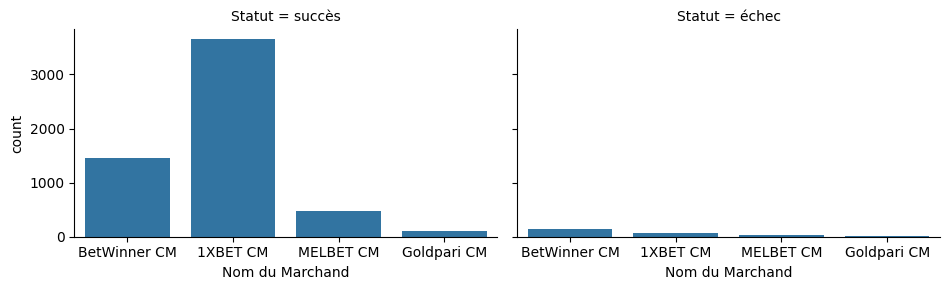

In [139]:
grid=sns.FacetGrid(dfpmt1, col='Statut', aspect=1.6)
grid.map(sns.countplot,'Nom du Marchand')

In [140]:
check_numero = dfpmt1.groupby(['Numéro de téléphone','Statut']).agg(
    Nombre=('Montant', 'count'),
    Volume=('Montant', 'sum')
)
check_numero

,,Nombre,Volume
Numéro de téléphone,Statut,,
237650001709,succès,1,15000.00
237650001949,succès,1,1600.00
237650002701,succès,2,11000.00
237650003768,succès,1,1400.00
237650004060,succès,1,15000.00
...,...,...,...
237688794313,échec,2,8400.00
237689411958,échec,1,4500.00
237690335637,échec,1,31750.00


In [141]:
check_numero.Nombre.unique()

array([ 1,  2,  3,  5,  4,  7,  9,  6,  8, 11])

In [142]:
verif=check_numero[check_numero['Nombre'] == 39]
verif

,,Nombre,Volume
Numéro de téléphone,Statut,,


In [143]:
trx_number =dfpmt1[dfpmt1['Numéro de téléphone'] == 237679098652]
trx_number.head(2)

,Created Date,Payment Date,Operator,Nom du Marchand,Transaction ID,ID Opérateur,Numéro de téléphone,Montant,Fee amount,Merchant amount,Statut,DateCourte,DATEOP,STATUTOP,IDOPERATOR,Fraisop,FraisPmt,MTN,Nombre


In [144]:
check3_8= check_numero.loc[check_numero['Nombre'] == 8]
check3_8

,,Nombre,Volume
Numéro de téléphone,Statut,,
237675200289,succès,8,11700.00
237679160318,succès,8,23300.00


In [145]:
select_marchand=dfpmt1.groupby('Nom du Marchand').agg(
    Nombre=('Montant', 'count'),
    Volume=('Montant', 'sum')
)
select_marchand

,Nombre,Volume
Nom du Marchand,,
1XBET CM,3718,79593766.00
BetWinner CM,1593,26119245.00
Goldpari CM,111,1034525.00
MELBET CM,495,5247875.00


In [146]:
df_filteredpmt['Frais_Mch']=df_filteredpmt['Fee amount'] / df_filteredpmt['Montant']

In [147]:
select_frais_marchand=df_filteredpmt.groupby('Nom du Marchand')['Frais_Mch'].apply(lambda x: list(set(x)))
select_frais_marchand.reset_index()

,Nom du Marchand,Frais_Mch
0,1XBET CM,"[0.04, 0.039999999999999994]"
1,BetWinner CM,"[0.02, 0.019999999999999997]"
2,Goldpari CM,[0.04]
3,MELBET CM,"[0.05, 0.049999999999999996]"


In [159]:
df_filteredpmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5917 entries, 0 to 5916
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Created Date         5917 non-null   object 
 1   Payment Date         0 non-null      float64
 2   Operator             5917 non-null   object 
 3   Nom du Marchand      5917 non-null   object 
 4   Transaction ID       5917 non-null   object 
 5   ID Opérateur         5669 non-null   float64
 6   Numéro de téléphone  5917 non-null   int64  
 7   Montant              5917 non-null   float64
 8   Fee amount           5917 non-null   float64
 9   Merchant amount      5917 non-null   object 
 10  Statut               5917 non-null   object 
 11  DateCourte           5917 non-null   object 
 12  DATEOP               3923 non-null   object 
 13  STATUTOP             3923 non-null   object 
 14  IDOPERATOR           3923 non-null   float64
 15  Fraisop              5917 non-null   f

AUTOMATISATION CHIFFRE AFFAIRE

In [164]:
#MISE EN PLACE DE RECHERCHE X POUR RECUPERATION CHEZ L'OP
        # Vérification des correspondances entre A1 et B1
correspondance_Montant_op= transfert.set_index('External id')['Amount'].abs()

df_filteredpmt['MtOP'] = df_filteredpmt['Transaction ID'].map(correspondance_Montant_op)

In [165]:
df_filteredpmt['taux_marchand']=df_filteredpmt['Fee amount'] / df_filteredpmt['Montant']
df_filteredpmt['Frais_op']= df_filteredpmt['Montant'] * 0.01
df_filteredpmt['pays']= 'CM'
df_filteredpmt['provider_name']='MTN CM Payout Direct'
df_filteredpmt['Tauxopp']= 0.01
df_filteredpmt['type']='Payout'
df_filteredpmt['Comm_op']=df_filteredpmt['Montant'] * df_filteredpmt['Tauxopp']
df_filteredpmt['Comm_ttc']=df_filteredpmt['Fee amount'] - df_filteredpmt['Comm_op']

In [166]:
chiffre_affaire_pmt = df_filteredpmt.rename(columns={
        'DateCourte': 'Date Creation',
        'Transaction ID': 'ID Transaction',
        'pays': 'country',
        'Nom du Marchand': 'merchant_name',
        'provider_name': 'provider_name',
        'Operator': 'operator',
        'Statut': 'statut',
        'Montant': 'montant_transactions',
        'Fee amount':'fee_amount',
        'taux_marchand':'Taux Marchand',
        'DATEOP':'Date OP',
        'IDOPERATOR':'ID OP',
        'MtOP':'Montant OP',
        'Frais_op':'Frais OP',
        'type':'Type',
        'Tauxopp':'Taux Opérateur',
        'Comm_op':'Commission OP',
        'Comm_ttc':'Commission TTC'
    })

In [167]:
chiffre_affaire=chiffre_affaire_pmt[['Date Creation',
                                     'ID Transaction',
                                     'country',
                                     'merchant_name',
                                     'provider_name',
                                     'operator',
                                     'statut',
                                     'montant_transactions',
                                     'fee_amount',
                                     'Taux Marchand',
                                     'Date OP',
                                     'ID OP',
                                     'Montant OP',
                                     'Frais OP',
                                     'Type',
                                     'Taux Opérateur',
                                     'Commission OP',
                                     'Commission TTC'
]]  

In [168]:
report_date = "20241216"
# Générer automatiquement le chemin de sortie avec la date actuelle
current_date = datetime.now().strftime("%Y%m%d_%H%M%S")
output_dir = 'D:\RECONCILIATIONS\TRANSFERT\MTN CM\CA\DEC'
output_file_name = f"{current_date}_RAPPORT_CA_MTNCM_PAYOUT_{report_date}.xlsx"
output_file_path = os.path.join(output_dir, output_file_name)

# Création de DataFrames d'exemple
CA = chiffre_affaire


# Dictionnaire de DataFrames
feuilles = {
    'Chiffre_Affaire': CA,
    
}

# Création de l'objet ExcelWriter
with pd.ExcelWriter(output_file_path, engine='openpyxl') as writer:
    for nom_feuille, df in feuilles.items():
        df.to_excel(writer, sheet_name=nom_feuille, index=False)

print(f"Fichier Excel avec plusieurs feuilles sauvegardé avec succès: {output_file_path}")

Fichier Excel avec plusieurs feuilles sauvegardé avec succès: D:\RECONCILIATIONS\TRANSFERT\MTN CM\CA\DEC\20241217_150955_RAPPORT_CA_MTNCM_PAYOUT_20241216.xlsx
